In [1]:
!pip install yfinance joblib openpyxl



In [2]:
# IMPORTS
# =====================================
import pandas as pd
import numpy as np
import yfinance as yf
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from google.colab import drive, files


In [3]:
drive.mount('/content/drive')

MODELS_DIR = "/content/drive/MyDrive/isolation_forest_models"
DATA_DIR   = "/content/drive/MyDrive/isolation_forest_data"

import os
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)


Mounted at /content/drive


In [4]:
# =====================================
# 1. Chargement des symboles
# =====================================
df_symbols = pd.read_excel("/content/symbols_list (2).xlsx")
symbols = df_symbols['symbol'].dropna().unique().tolist()
print(f"{len(symbols)} symboles chargés.")

338 symboles chargés.


In [6]:
# =====================================
# 2. Paramètres
# =====================================
START_DATE = "2018-01-01"
END_DATE   = "2025-12-01"

CONTAMINATION = 0.02
N_ESTIMATORS  = 100
RANDOM_STATE  = 42


In [8]:
def download_symbol(symbol):
    df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)

    if df.empty or 'Close' not in df.columns:
        return None

    df = df.reset_index()[['Date', 'Close']]
    df.columns = ['date', 'close']

    df['date'] = pd.to_datetime(df['date'])
    df['close'] = pd.to_numeric(df['close'], errors='coerce')

    df.dropna(inplace=True)

    return df


In [9]:
all_results = []
trained_symbols = []

for symbol in symbols:
    print(f"\n🔄 Traitement de {symbol}")

    df = download_symbol(symbol)

    if df is None or len(df) < 100:
        print("⚠️ Données insuffisantes")
        continue

    # ==========================
    # Standardisation
    # ==========================
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[['close']])

    # ==========================
    # Isolation Forest
    # ==========================
    model = IsolationForest(
        n_estimators=N_ESTIMATORS,
        contamination=CONTAMINATION,
        random_state=RANDOM_STATE
    )

    df['anomaly'] = model.fit_predict(X_scaled)
    df['anomaly_score'] = model.decision_function(X_scaled)
    df['symbol'] = symbol

    # ==========================
    # Sauvegarde
    # ==========================
    joblib.dump(model,  f"{MODELS_DIR}/{symbol}_iforest.pkl")
    joblib.dump(scaler, f"{MODELS_DIR}/{symbol}_scaler.pkl")

    df.to_csv(f"{DATA_DIR}/{symbol}.csv", index=False)

    print(f"✅ Modèle et scaler sauvegardés pour {symbol}")

    all_results.append(df)
    trained_symbols.append(symbol)



🔄 Traitement de CAP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CAP.PA

🔄 Traitement de AI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AI.PA

🔄 Traitement de CA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CA.PA

🔄 Traitement de DSY.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DSY.PA

🔄 Traitement de EDEN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EDEN.PA

🔄 Traitement de KER.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour KER.PA

🔄 Traitement de LR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LR.PA

🔄 Traitement de ML.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ML.PA

🔄 Traitement de ORA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ORA.PA

🔄 Traitement de RI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour RI.PA

🔄 Traitement de PUB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PUB.PA

🔄 Traitement de SGO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SGO.PA

🔄 Traitement de SAN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SAN.PA

🔄 Traitement de SU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SU.PA

🔄 Traitement de TEP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TEP.PA

🔄 Traitement de URW.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour URW.PA

🔄 Traitement de WLN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour WLN.PA

🔄 Traitement de NEX.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NEX.PA

🔄 Traitement de VLA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VLA.PA

🔄 Traitement de MAU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MAU.PA

🔄 Traitement de SEC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SEC.PA

🔄 Traitement de ALTVO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTVO.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de OVH.PA
✅ Modèle et scaler sauvegardés pour OVH.PA

🔄 Traitement de CEN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CEN.PA

🔄 Traitement de ALAMA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALAMA.PA

🔄 Traitement de LOUP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LOUP.PA

🔄 Traitement de ALPIX.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALPIX.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de AUGR.PA
✅ Modèle et scaler sauvegardés pour AUGR.PA

🔄 Traitement de UBI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour UBI.PA

🔄 Traitement de ALPRE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALPRE.PA

🔄 Traitement de TOUP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TOUP.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de BLC.PA
✅ Modèle et scaler sauvegardés pour BLC.PA

🔄 Traitement de SELER.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SELER.PA

🔄 Traitement de ALPRI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALPRI.PA

🔄 Traitement de SW.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SW.PA

🔄 Traitement de ACAN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ACAN.PA

🔄 Traitement de MLFTI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLFTI.PA

🔄 Traitement de SDG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SDG.PA

🔄 Traitement de PROAC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PROAC.PA

🔄 Traitement de SCR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SCR.PA

🔄 Traitement de ALDLS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDLS.PA

🔄 Traitement de GV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GV.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALKEY.PA
✅ Modèle et scaler sauvegardés pour ALKEY.PA

🔄 Traitement de AURE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AURE.PA

🔄 Traitement de WAVE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour WAVE.PA

🔄 Traitement de ALTER.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTER.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALVDM.PA
✅ Modèle et scaler sauvegardés pour ALVDM.PA

🔄 Traitement de VTR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VTR.PA

🔄 Traitement de ARAMI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ARAMI.PA

🔄 Traitement de ICAD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ICAD.PA

🔄 Traitement de ALDOL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDOL.PA

🔄 Traitement de ALCBI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCBI.PA

🔄 Traitement de ALNRG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALNRG.PA

🔄 Traitement de ALHUN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALHUN.PA

🔄 Traitement de GNFT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour GNFT.PA

🔄 Traitement de ALAGR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALAGR.PA

🔄 Traitement de ALPRG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALPRG.PA

🔄 Traitement de CAF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CAF.PA

🔄 Traitement de ALBLU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALBLU.PA

🔄 Traitement de AKE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AKE.PA

🔄 Traitement de MLCFD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLCFD.PA

🔄 Traitement de ALCRB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCRB.PA

🔄 Traitement de ALESE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALESE.PA

🔄 Traitement de SESL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SESL.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALLEC.PA
✅ Modèle et scaler sauvegardés pour ALLEC.PA

🔄 Traitement de FCMC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FCMC.PA

🔄 Traitement de QDT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour QDT.PA

🔄 Traitement de CRLO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CRLO.PA

🔄 Traitement de ALDUB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDUB.PA

🔄 Traitement de JCQ.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour JCQ.PA

🔄 Traitement de ALCAP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALCAP.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALBLD.PA
✅ Modèle et scaler sauvegardés pour ALBLD.PA

🔄 Traitement de ALTXC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALTXC.PA

🔄 Traitement de ALUVI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALUVI.PA

🔄 Traitement de PIG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PIG.PA

🔄 Traitement de CHSR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CHSR.PA

🔄 Traitement de RUI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour RUI.PA

🔄 Traitement de CRBP2.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CRBP2.PA

🔄 Traitement de ALICR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALICR.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALDEL.PA
✅ Modèle et scaler sauvegardés pour ALDEL.PA

🔄 Traitement de ALAST.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALAST.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALCJ.PA
✅ Modèle et scaler sauvegardés pour ALCJ.PA

🔄 Traitement de PWG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PWG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALTBG.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTBG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PARRO.PA
✅ Modèle et scaler sauvegardés pour PARRO.PA

🔄 Traitement de EKI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EKI.PA

🔄 Traitement de ALCUR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCUR.PA

🔄 Traitement de GDS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour GDS.PA

🔄 Traitement de LACR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LACR.PA

🔄 Traitement de ENGI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ENGI.PA

🔄 Traitement de DBV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DBV.PA

🔄 Traitement de CARM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CARM.PA

🔄 Traitement de SBT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SBT.PA

🔄 Traitement de ALTUR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTUR.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de GUI.PA
✅ Modèle et scaler sauvegardés pour GUI.PA

🔄 Traitement de ALEO2.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALEO2.PA

🔄 Traitement de ALAGP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALAGP.PA

🔄 Traitement de AELIS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AELIS.PA

🔄 Traitement de ALVER.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALVER.PA

🔄 Traitement de NXI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NXI.PA

🔄 Traitement de ALREA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALREA.PA

🔄 Traitement de VIL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VIL.PA

🔄 Traitement de ALINS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALINS.PA

🔄 Traitement de RE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de EQS.PA
✅ Modèle et scaler sauvegardés pour EQS.PA

🔄 Traitement de ALNOV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALNOV.PA

🔄 Traitement de SK.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SK.PA

🔄 Traitement de ALPJT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALPJT.PA

🔄 Traitement de ALMLB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALMLB.PA

🔄 Traitement de VMX.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VMX.PA

🔄 Traitement de ALMDP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALMDP.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ORIA.PA
✅ Modèle et scaler sauvegardés pour ORIA.PA

🔄 Traitement de ALGIL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGIL.PA

🔄 Traitement de ALGIR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGIR.PA

🔄 Traitement de AM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AM.PA

🔄 Traitement de ALLAN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALLAN.PA

🔄 Traitement de EXE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EXE.PA

🔄 Traitement de ALMIC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALMIC.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALFLO.PA
✅ Modèle et scaler sauvegardés pour ALFLO.PA

🔄 Traitement de LHYFE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LHYFE.PA

🔄 Traitement de EL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EL.PA

🔄 Traitement de ALLGO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALLGO.PA

🔄 Traitement de TRI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TRI.PA

🔄 Traitement de ADP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ADP.PA

🔄 Traitement de ALENT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALENT.PA

🔄 Traitement de EIFF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EIFF.PA

🔄 Traitement de ALBPS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALBPS.PA

🔄 Traitement de ALCOG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCOG.PA

🔄 Traitement de PAT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PAT.PA

🔄 Traitement de ALBIO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALBIO.PA

🔄 Traitement de MLEDR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLEDR.PA

🔄 Traitement de MLSML.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLSML.PA

🔄 Traitement de PVL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PVL.PA

🔄 Traitement de ALLHB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALLHB.PA

🔄 Traitement de MLONL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLONL.PA

🔄 Traitement de ALMAS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALMAS.PA

🔄 Traitement de NRO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NRO.PA

🔄 Traitement de RAL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour RAL.PA

🔄 Traitement de ALKAL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALKAL.PA

🔄 Traitement de LSS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LSS.PA

🔄 Traitement de ALLOG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALLOG.PA

🔄 Traitement de ALDMS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDMS.PA

🔄 Traitement de FINM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FINM.PA

🔄 Traitement de TE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TE.PA

🔄 Traitement de MALT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MALT.PA

🔄 Traitement de ALGBE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGBE.PA

🔄 Traitement de ALVGO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALVGO.PA

🔄 Traitement de FREY.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FREY.PA

🔄 Traitement de ODET.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ODET.PA

🔄 Traitement de ALTTI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTTI.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALIMR.PA
✅ Modèle et scaler sauvegardés pour ALIMR.PA

🔄 Traitement de ALMIB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALMIB.PA

🔄 Traitement de ADOC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ADOC.PA

🔄 Traitement de EXPL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EXPL.PA

🔄 Traitement de OR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour OR.PA

🔄 Traitement de ALVAL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALVAL.PA

🔄 Traitement de MLLOI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLLOI.PA

🔄 Traitement de RNO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour RNO.PA

🔄 Traitement de ALEMG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALEMG.PA

🔄 Traitement de ALQGC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALQGC.PA

🔄 Traitement de ITE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ITE.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PSAT.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSAT.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PARP.PA
✅ Modèle et scaler sauvegardés pour PARP.PA

🔄 Traitement de ALDNE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDNE.PA

🔄 Traitement de ALRIB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALRIB.PA

🔄 Traitement de AREIT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AREIT.PA

🔄 Traitement de TNG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TNG.PA

🔄 Traitement de ALBDM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALBDM.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALQWA.PA
✅ Modèle et scaler sauvegardés pour ALQWA.PA

🔄 Traitement de ALARF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALARF.PA

🔄 Traitement de BNP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BNP.PA

🔄 Traitement de ALVU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALVU.PA

🔄 Traitement de JBOG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour JBOG.PA

🔄 Traitement de MRM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRM.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ARTO.PA
✅ Modèle et scaler sauvegardés pour ARTO.PA

🔄 Traitement de ALITL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALITL.PA

🔄 Traitement de SII.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SII.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de LIN.PA
✅ Modèle et scaler sauvegardés pour LIN.PA

🔄 Traitement de ALSTW.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALSTW.PA

🔄 Traitement de ORP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORP.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de SACI.PA
✅ Modèle et scaler sauvegardés pour SACI.PA

🔄 Traitement de HDF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour HDF.PA

🔄 Traitement de BIG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BIG.PA

🔄 Traitement de SAF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SAF.PA

🔄 Traitement de AB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AB.PA

🔄 Traitement de LAT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LAT.PA

🔄 Traitement de MEDCL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MEDCL.PA

🔄 Traitement de ALAQU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALAQU.PA

🔄 Traitement de ALGRE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALGRE.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de TFF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALMII.PA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-01 -> 2025-12-01)')


✅ Modèle et scaler sauvegardés pour TFF.PA

🔄 Traitement de ALMII.PA
⚠️ Données insuffisantes

🔄 Traitement de BASS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BASS.PA

🔄 Traitement de CIV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CIV.PA

🔄 Traitement de EOS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EOS.PA

🔄 Traitement de ALOBR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALOBR.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de GRVO.PA
✅ Modèle et scaler sauvegardés pour GRVO.PA

🔄 Traitement de CRAP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CRAP.PA

🔄 Traitement de ALGEV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGEV.PA

🔄 Traitement de ALBKK.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALBKK.PA

🔄 Traitement de ALORA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALORA.PA

🔄 Traitement de ALAUD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALAUD.PA

🔄 Traitement de LNA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LNA.PA

🔄 Traitement de ALHYG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALHYG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALATA.PA
✅ Modèle et scaler sauvegardés pour ALATA.PA

🔄 Traitement de ESI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESI.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de NEOEN.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEOEN.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALACT.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALACT.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de BIM.PA
✅ Modèle et scaler sauvegardés pour BIM.PA

🔄 Traitement de MLMGL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLMGL.PA

🔄 Traitement de ALGEN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGEN.PA

🔄 Traitement de AVT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AVT.PA

🔄 Traitement de SOI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SOI.PA

🔄 Traitement de DPT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DPT.PA

🔄 Traitement de ALDBT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDBT.PA

🔄 Traitement de METEX.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour METEX.PA

🔄 Traitement de CS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CS.PA

🔄 Traitement de TKO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TKO.PA

🔄 Traitement de ALEMV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALEMV.PA

🔄 Traitement de SPIE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SPIE.PA

🔄 Traitement de CFI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CFI.PA

🔄 Traitement de NACON.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NACON.PA

🔄 Traitement de CGG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CGG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALNFL.PA
✅ Modèle et scaler sauvegardés pour ALNFL.PA

🔄 Traitement de ALHGR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALHGR.PA

🔄 Traitement de EXN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EXN.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de MLGAI.PA
✅ Modèle et scaler sauvegardés pour MLGAI.PA

🔄 Traitement de OSE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour OSE.PA

🔄 Traitement de EXA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour EXA.PA

🔄 Traitement de ALENE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALENE.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALFLE.PA
✅ Modèle et scaler sauvegardés pour ALFLE.PA

🔄 Traitement de LTA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour LTA.PA

🔄 Traitement de ATE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ATE.PA

🔄 Traitement de ELEC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ELEC.PA

🔄 Traitement de CAFO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAFO.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ADUX.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADUX.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de AUB.PA
✅ Modèle et scaler sauvegardés pour AUB.PA

🔄 Traitement de VIRP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VIRP.PA

🔄 Traitement de AMUN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AMUN.PA

🔄 Traitement de ALENO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALENO.PA

🔄 Traitement de MRN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MRN.PA

🔄 Traitement de NANO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NANO.PA

🔄 Traitement de CROS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CROS.PA

🔄 Traitement de BB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BB.PA

🔄 Traitement de SFPI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SFPI.PA

🔄 Traitement de DEC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DEC.PA

🔄 Traitement de ALBOU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALBOU.PA

🔄 Traitement de COFA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour COFA.PA

🔄 Traitement de DKUPL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DKUPL.PA

🔄 Traitement de FNAC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FNAC.PA

🔄 Traitement de CDA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CDA.PA

🔄 Traitement de ALINT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALINT.PA

🔄 Traitement de BSD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BSD.PA

🔄 Traitement de ALU10.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALU10.PA

🔄 Traitement de WAGA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour WAGA.PA

🔄 Traitement de ALENR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALENR.PA

🔄 Traitement de PRC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PRC.PA

🔄 Traitement de ALECP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALECP.PA

🔄 Traitement de DBG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DBG.PA

🔄 Traitement de VETO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VETO.PA

🔄 Traitement de ABVX.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ABVX.PA

🔄 Traitement de ALODC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALODC.PA

🔄 Traitement de EUR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EUR.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALHEX.PA
✅ Modèle et scaler sauvegardés pour ALHEX.PA

🔄 Traitement de FALG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FALG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de MLOCT.PA
✅ Modèle et scaler sauvegardés pour MLOCT.PA

🔄 Traitement de IDL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour IDL.PA

🔄 Traitement de TTE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour TTE.PA

🔄 Traitement de NHOA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NHOA.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALNMR.PA
✅ Modèle et scaler sauvegardés pour ALNMR.PA

🔄 Traitement de AF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AF.PA

🔄 Traitement de MLMAD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLMAD.PA

🔄 Traitement de PEUG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour PEUG.PA

🔄 Traitement de ALPHA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALPHA.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALVIV.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALVIV.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PERR.PA
✅ Modèle et scaler sauvegardés pour PERR.PA

🔄 Traitement de GALIM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GALIM.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALTRO.PA
✅ Modèle et scaler sauvegardés pour ALTRO.PA

🔄 Traitement de ALCIS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCIS.PA

🔄 Traitement de BEN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BEN.PA

🔄 Traitement de ALGAU.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALGAU.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de BN.PA
✅ Modèle et scaler sauvegardés pour BN.PA

🔄 Traitement de IVA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour IVA.PA

🔄 Traitement de ALRGR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALRGR.PA

🔄 Traitement de ALGEC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGEC.PA

🔄 Traitement de ALWF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALWF.PA

🔄 Traitement de CBDG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour CBDG.PA

🔄 Traitement de ALDRV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALDRV.PA

🔄 Traitement de FGA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FGA.PA

🔄 Traitement de ALWED.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALWED.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de OLG.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OLG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PAR.PA
✅ Modèle et scaler sauvegardés pour PAR.PA

🔄 Traitement de NRG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NRG.PA

🔄 Traitement de ETL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ETL.PA

🔄 Traitement de ALCLS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCLS.PA

🔄 Traitement de ALCYB.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALCYB.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de MDM.PA
✅ Modèle et scaler sauvegardés pour MDM.PA

🔄 Traitement de MLVST.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLVST.PA

🔄 Traitement de IMDA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour IMDA.PA

🔄 Traitement de FLY.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FLY.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALAFY.PA
✅ Modèle et scaler sauvegardés pour ALAFY.PA

🔄 Traitement de ALESK.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALESK.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de CDI.PA
✅ Modèle et scaler sauvegardés pour CDI.PA

🔄 Traitement de AAA.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour AAA.PA

🔄 Traitement de FGR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FGR.PA

🔄 Traitement de ALFRE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALFRE.PA

🔄 Traitement de CATG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CATG.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de VLTSA.PA
✅ Modèle et scaler sauvegardés pour VLTSA.PA

🔄 Traitement de FIPP.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour FIPP.PA

🔄 Traitement de VAC.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour VAC.PA

🔄 Traitement de DPAM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DPAM.PA

🔄 Traitement de ALCOR.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALCOR.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de PCA.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCA.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de AKW.PA
✅ Modèle et scaler sauvegardés pour AKW.PA

🔄 Traitement de ALNEV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALNEV.PA

🔄 Traitement de ALCHI.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALCHI.PA

🔄 Traitement de UNBL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UNBL.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de ALO.PA
✅ Modèle et scaler sauvegardés pour ALO.PA

🔄 Traitement de ALKEM.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALKEM.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de POM.PA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['POM.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de FDE.PA
✅ Modèle et scaler sauvegardés pour FDE.PA

🔄 Traitement de NK.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour NK.PA

🔄 Traitement de ALGLD.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALGLD.PA

🔄 Traitement de MCPHY.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCPHY.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de SIGHT.PA
✅ Modèle et scaler sauvegardés pour SIGHT.PA

🔄 Traitement de MEMS.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MEMS.PA

🔄 Traitement de ALHF.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALHF.PA

🔄 Traitement de ALTUV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALTUV.PA

🔄 Traitement de SAVE.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour SAVE.PA

🔄 Traitement de BLV.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLV.PA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


⚠️ Données insuffisantes

🔄 Traitement de VIV.PA
✅ Modèle et scaler sauvegardés pour VIV.PA

🔄 Traitement de ALNN6.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALNN6.PA

🔄 Traitement de ALMDT.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALMDT.PA

🔄 Traitement de ALADO.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour ALADO.PA

🔄 Traitement de COH.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour COH.PA

🔄 Traitement de MLSDN.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour MLSDN.PA

🔄 Traitement de DG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour DG.PA

🔄 Traitement de BOL.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)


✅ Modèle et scaler sauvegardés pour BOL.PA

🔄 Traitement de ALVMG.PA


/tmp/ipython-input-2672853470.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE, progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALVMG.PA']: YFTzMissingError('possibly delisted; no timezone found')


⚠️ Données insuffisantes


In [10]:
df_results = pd.concat(all_results, ignore_index=True)

df_results['anomaly_label'] = df_results['anomaly'].map({
    -1: 'Anomalie',
     1: 'Normal'
})

print("\n📌 Résumé global :")
print(df_results['anomaly_label'].value_counts())

OUTPUT_FILE = "anomalies_isolation_forest_FINAL.xlsx"
df_results.to_excel(OUTPUT_FILE, index=False)

files.download(OUTPUT_FILE)



📌 Résumé global :
anomaly_label
Normal      535743
Anomalie     10763
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
def plot_anomalies(df, symbol):
    plt.figure(figsize=(14, 6))

    plt.plot(df['date'], df['close'], label='Close', linewidth=2)

    anomalies = df[df['anomaly'] == -1]
    plt.scatter(
        anomalies['date'],
        anomalies['close'],
        color='red',
        label='Anomalies',
        s=40
    )

    plt.title(f"Détection d’anomalies – {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.legend()
    plt.grid(True)
    plt.show()


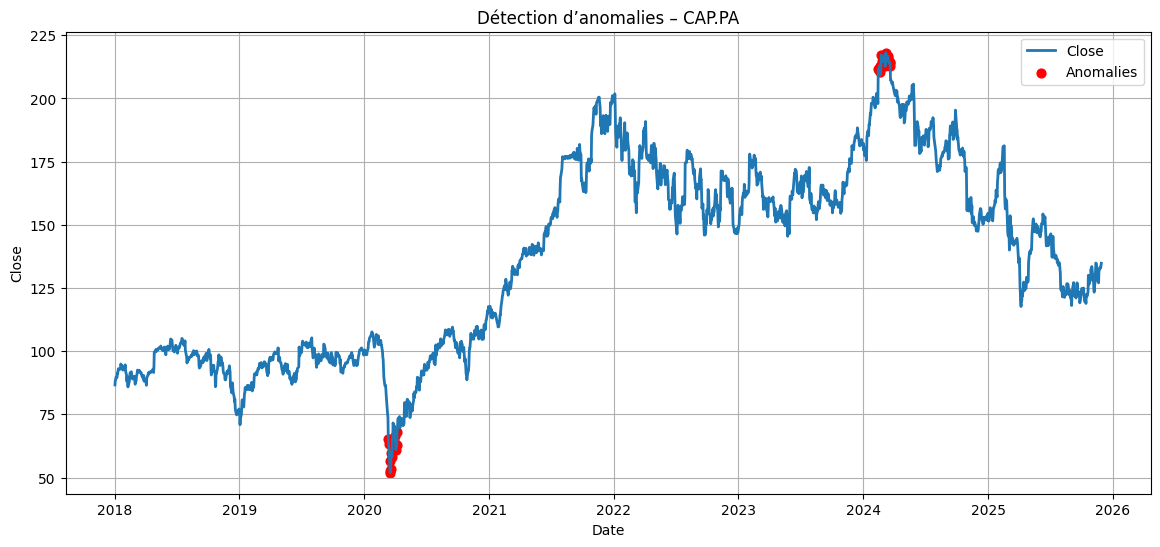

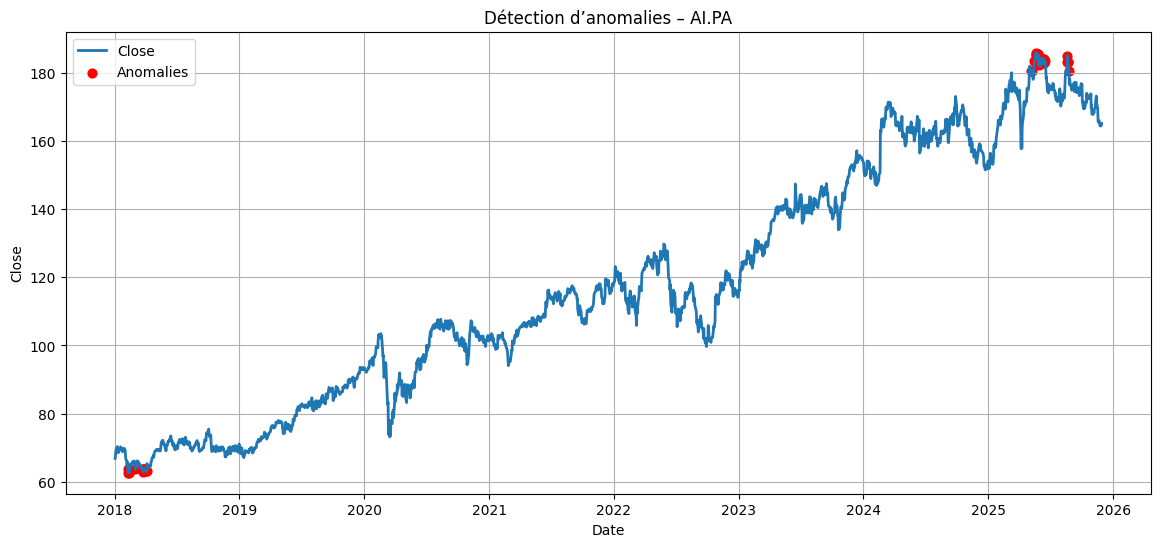

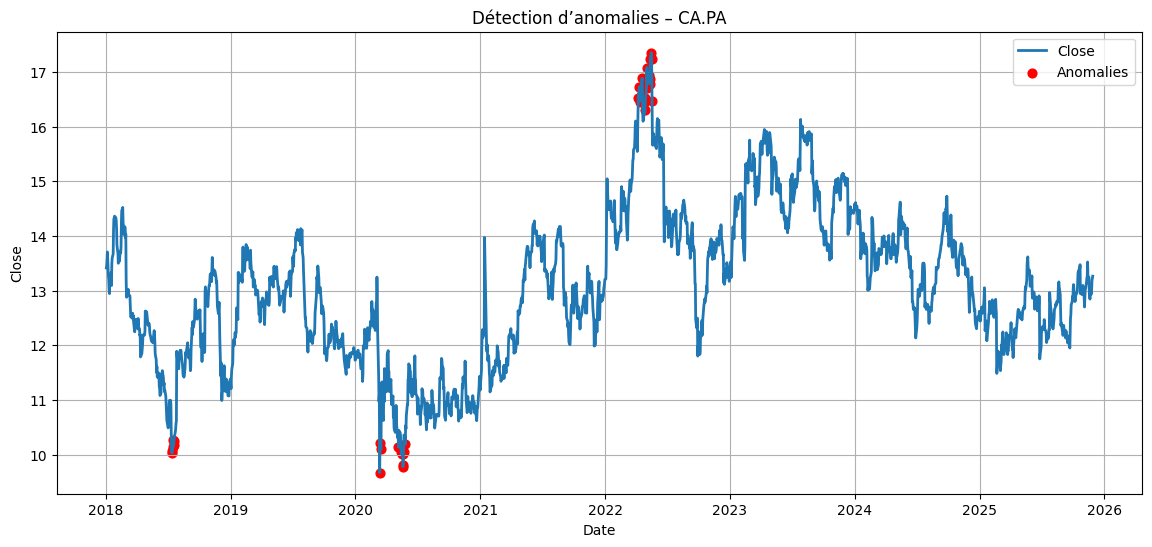

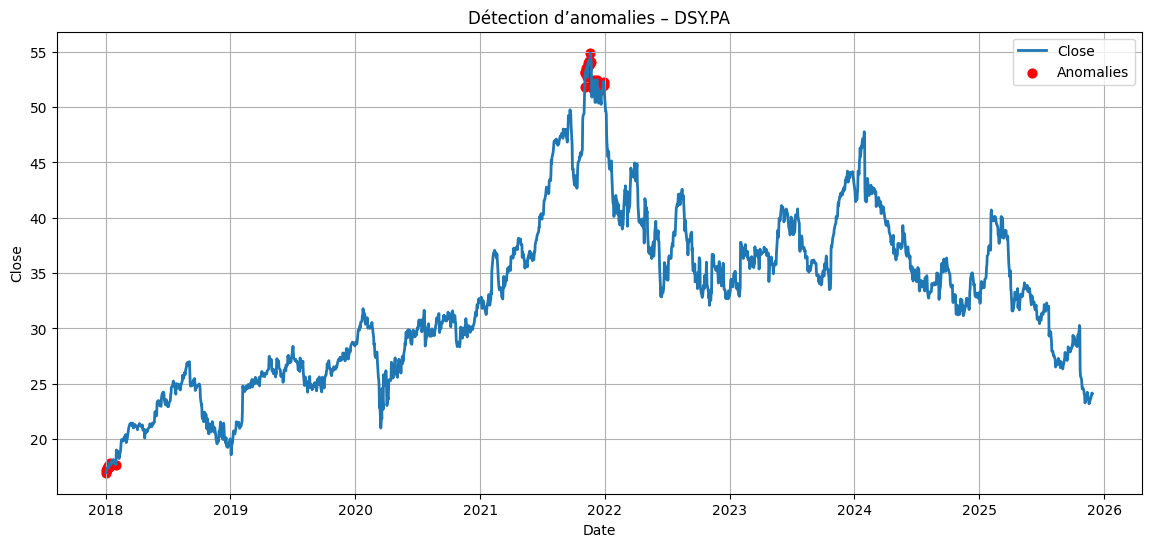

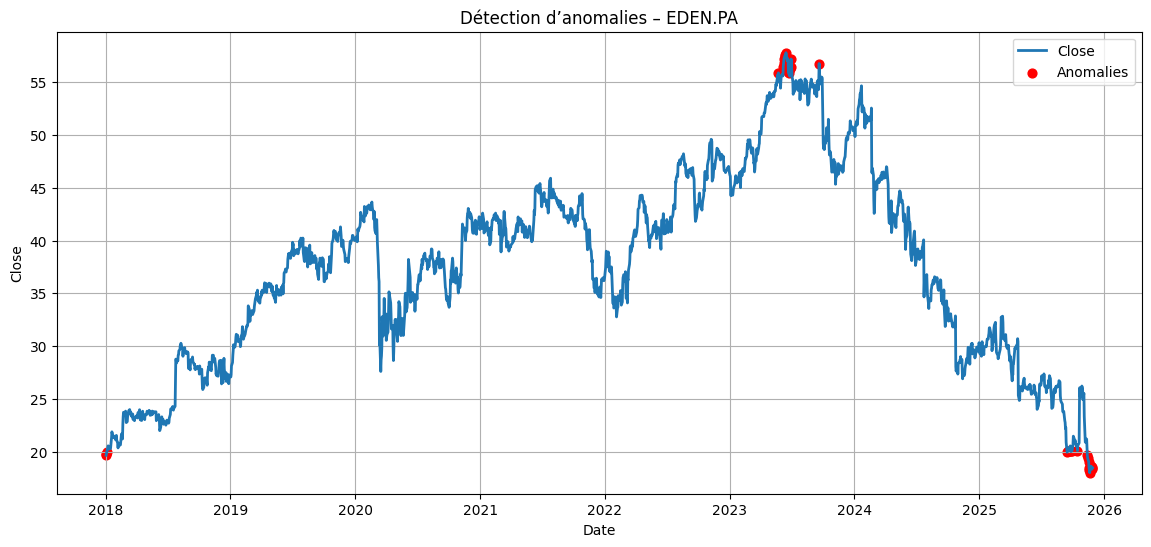

In [12]:
for symbol in trained_symbols[:5]:
    df_test = df_results[df_results['symbol'] == symbol]
    plot_anomalies(df_test, symbol)


In [13]:
import numpy, sklearn
print("NumPy:", numpy.__version__)
print("Sklearn:", sklearn.__version__)


NumPy: 2.0.2
Sklearn: 1.6.1
